In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Colab/Global Human Trafficking.xlsx"
humantrafficking=pd.read_excel(path)
import numpy as np
import seaborn as sns
import plotly
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

humantrafficking.replace(-99, np.nan, inplace=True)

!pip install matplotlib



In [4]:
print(humantrafficking.shape)

(48801, 63)


In [5]:
humantrafficking.count()

yearOfRegistration                  48801
Datasource                          48801
gender                              48801
ageBroad                            36439
majorityStatus                      36439
                                    ...  
recruiterRelationIntimatePartner    39994
recruiterRelationFriend             39994
recruiterRelationFamily             39994
recruiterRelationOther              39994
recruiterRelationUnknown            48724
Length: 63, dtype: int64

In [6]:
humantrafficking.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,meansOfControlConcatenated,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfExploitConcatenated,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfLabourConcatenated,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
1,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
2,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
3,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
4,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0


In [7]:
humantrafficking['gender'].value_counts().to_frame() 

,gender
Female,35534
Male,13267


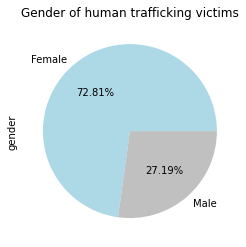

In [8]:
humantrafficking['gender'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=['lightblue','silver'])
plt.title('Gender of human trafficking victims')
plt.show()

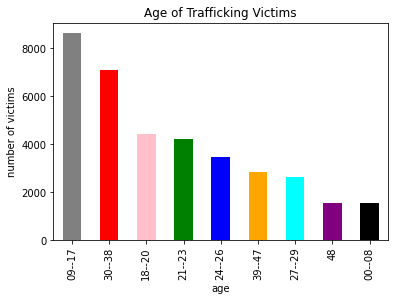

In [10]:
humantrafficking.ageBroad.value_counts()

humantrafficking.loc[humantrafficking.ageBroad == '0--8', 'ageBroad'] = '00--08'
humantrafficking.loc[humantrafficking.ageBroad == '9--17', 'ageBroad'] = '09--17'
plt.figure()

humantrafficking.ageBroad.value_counts().plot(kind='bar', color=['grey','red','pink','green','blue','orange','cyan','purple','black'])
plt.title('Age of Trafficking Victims')
plt.xlabel('age')
plt.ylabel('number of victims')
plt.show()


In [11]:
t=humantrafficking['yearOfRegistration'].value_counts()[:5]
t.head(5)

2016    16399
2017     6508
2018     5818
2015     4276
2014     3000
Name: yearOfRegistration, dtype: int64

In [12]:
graph1=go.Bar(x=list(t.index),y=list(t.values),marker=dict(color='rgb(128,0,128)',line=dict(color='rgb(128,0,128)',width=1.5)))
layout=go.Layout(template="seaborn",title='Top 5 Years of Registration',xaxis=dict(title='year'),yaxis=dict(title='count'))


fig=go.Figure(data=[graph1],layout=layout)
fig.show()

In [13]:
humantrafficking['meansOfControlConcatenated'] = humantrafficking['meansOfControlConcatenated'].str.replace('Abuse', 'abuse', regex=True)
data_bar_f = humantrafficking[(humantrafficking.meansOfControlConcatenated.notna()) & (humantrafficking.majorityStatus == 'Adult')].meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
data_bar_m = humantrafficking[(humantrafficking.meansOfControlConcatenated.notna()) & (humantrafficking.majorityStatus== 'Minor')].meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)

colors=['yellowgreen']*18
colors2=['coral']*18
fig = go.Figure(data=[go.Bar(name='Adult', x=data_bar_f.index, y=data_bar_f,marker_color=colors),go.Bar(name='Minor', x=data_bar_m.index, y=data_bar_m,marker_color=colors2)])
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.update_layout(hovermode='x', title_text='Different Type of Means of Control Characterized by Majority Status',title_font=dict(size=20))
fig.show()



In [ ]:
data_bar_f = humantrafficking[(humantrafficking.typeOfExploitConcatenated.notna()) & (humantrafficking.gender == 'Female')].typeOfExploitConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
data_bar_m = humantrafficking[(humantrafficking.typeOfExploitConcatenated.notna()) & (humantrafficking.gender == 'Male')].typeOfExploitConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)

colors=['gold']*6
colors2=['silver']*6
fig = go.Figure(data=[
    go.Bar(name='Female', x=data_bar_f.index, y=data_bar_f,marker_color=colors),
    go.Bar(name='Male', x=data_bar_m.index, y=data_bar_m,marker_color=colors2)
])
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.update_layout(title_text='Different Type of Exploitations',title_font=dict(size=20))
fig.show()

In [ ]:
humantrafficking['typeOfSexConcatenated'] = humantrafficking['typeOfSexConcatenated'].str.replace('Abuse', 'abuse', regex=True)
data_bar_f = humantrafficking[(humantrafficking.typeOfSexConcatenated.notna()) & (humantrafficking.gender == 'Female')].typeOfSexConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
data_bar_m = humantrafficking[(humantrafficking.typeOfSexConcatenated.notna()) & (humantrafficking.gender == 'Male')].typeOfSexConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)

colors=['olive']*3
colors2=['grey']*3
fig = go.Figure(data=[go.Bar(name='Female', x=data_bar_f.index, y=data_bar_f,marker_color=colors),go.Bar(name='Male', x=data_bar_m.index, y=data_bar_m,marker_color=colors2)])
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.update_layout(hovermode='x', title_text='Different Type of Sex Exploitations between Male & Female',title_font=dict(size=20))
fig.show()
